In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert job_skill column from string to clean list of skills
df['job_skills'] = df['job_skills'].apply(
    lambda x: [skill.strip().strip("[]()'\"") for skill in x.split(',')] if pd.notnull(x) else [])

c:\Users\HP\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


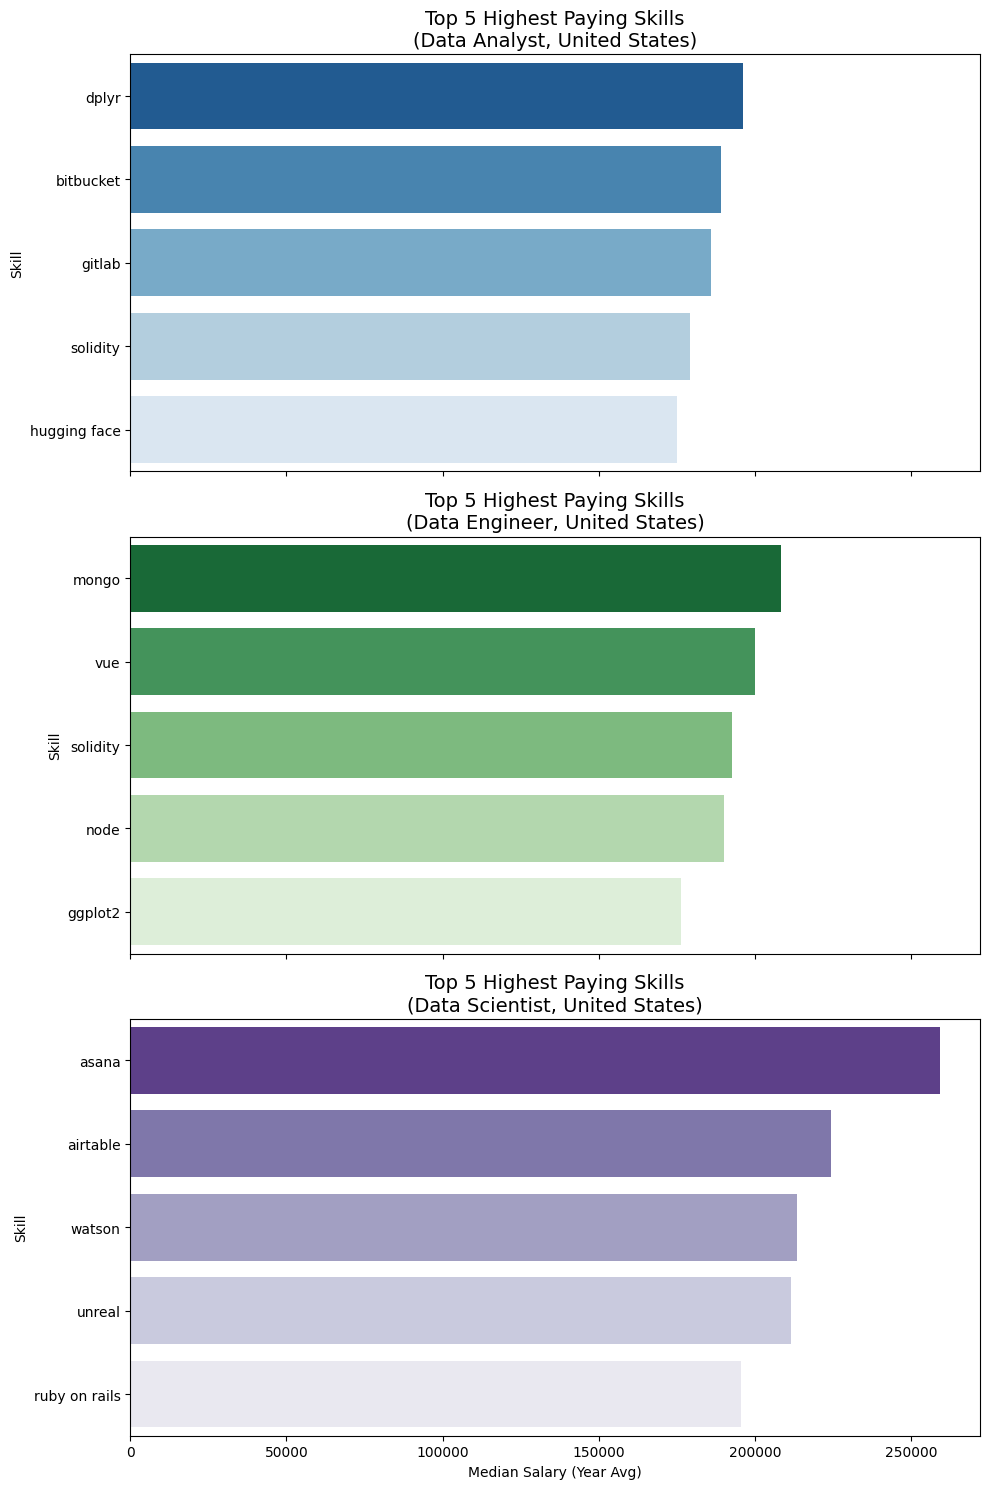

In [3]:
# 1. Filter for United States only
us_df = df[df['job_country'].str.lower() == 'united states']

# 2. Define job titles and their color palettes
titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
palettes = ["Blues", "Greens", "Purples"]

# 3. Find the global max salary for x-axis limit
global_max = 0
top_skills_list = []
for title in titles:
    sub_df = us_df[
        (us_df['job_title_short'].str.lower() == title.lower()) &
        (us_df['salary_year_avg'].notna())
    ]
    exploded = sub_df.explode('job_skills')
    # Sort descending so tallest bar is first (top)
    top_skills = (
        exploded.groupby('job_skills')['salary_year_avg']
        .median()
        .sort_values(ascending=False)
        .head(5)
    )
    top_skills_list.append(top_skills)
    if not top_skills.empty:
        global_max = max(global_max, top_skills.max())

# 4. Create subplots: 3 rows, 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# 5. Plot for each job title
for i, (title, palette, top_skills) in enumerate(zip(titles, palettes, top_skills_list)):
    # Reverse the palette so the first (darkest) color is at the top
    colors = sns.color_palette(palette, n_colors=5)[::-1]
    # Plot horizontal bar chart (tallest at top, darkest at top)
    sns.barplot(
        x=top_skills.values,
        y=top_skills.index,
        hue=top_skills.index, # Use index as hue to color bars
        ax=axs[i],
        palette=colors
    )
    axs[i].set_title(f'Top 5 Highest Paying Skills\n({title}, United States)', fontsize=14)
    axs[i].set_xlabel('Median Salary (Year Avg)')
    axs[i].set_ylabel('Skill')
    axs[i].set_xlim(0, global_max * 1.05)  # Set same x-axis for all

plt.tight_layout()
plt.show()

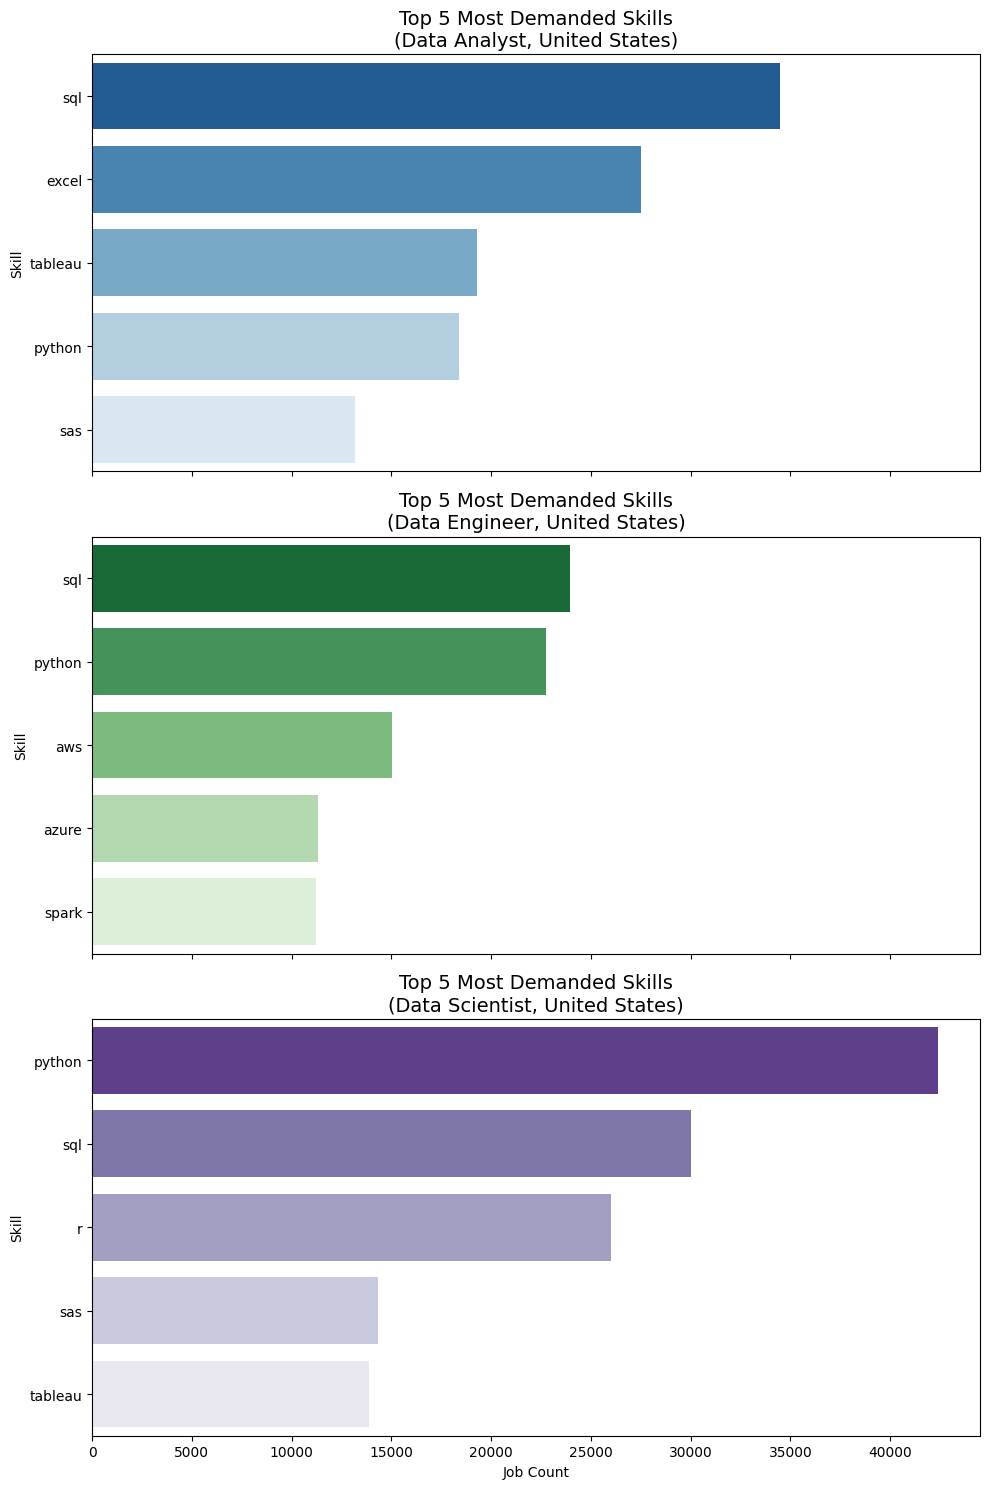

In [4]:
# 1. Filter for United States only
us_df = df[df['job_country'].str.lower() == 'united states']

# 2. Define job titles and their color palettes
titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
palettes = ["Blues", "Greens", "Purples"]

# 3. Find the global max count for x-axis limit
global_max = 0
top_skills_list = []
for title in titles:
    sub_df = us_df[
        (us_df['job_title_short'].str.lower() == title.lower())
    ]
    exploded = sub_df.explode('job_skills')
    # Sort descending so tallest bar is first (top)
    top_skills = (
        exploded['job_skills']
        .value_counts()
        .head(5)
    )
    top_skills_list.append(top_skills)
    if not top_skills.empty:
        global_max = max(global_max, top_skills.max())

# 4. Create subplots: 3 rows, 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# 5. Plot for each job title
for i, (title, palette, top_skills) in enumerate(zip(titles, palettes, top_skills_list)):
    # Reverse the palette so the first (darkest) color is at the top
    colors = sns.color_palette(palette, n_colors=5)[::-1]
    # Plot horizontal bar chart (tallest at top, darkest at top)
    sns.barplot(
        x=top_skills.values,
        y=top_skills.index,
        hue=top_skills.index,  # Use index as hue to color bars
        ax=axs[i],
        palette=colors
    )
    axs[i].set_title(f'Top 5 Most Demanded Skills\n({title}, United States)', fontsize=14)
    axs[i].set_xlabel('Job Count')
    axs[i].set_ylabel('Skill')
    axs[i].set_xlim(0, global_max * 1.05)  # Set same x-axis for all

plt.tight_layout()
plt.show()

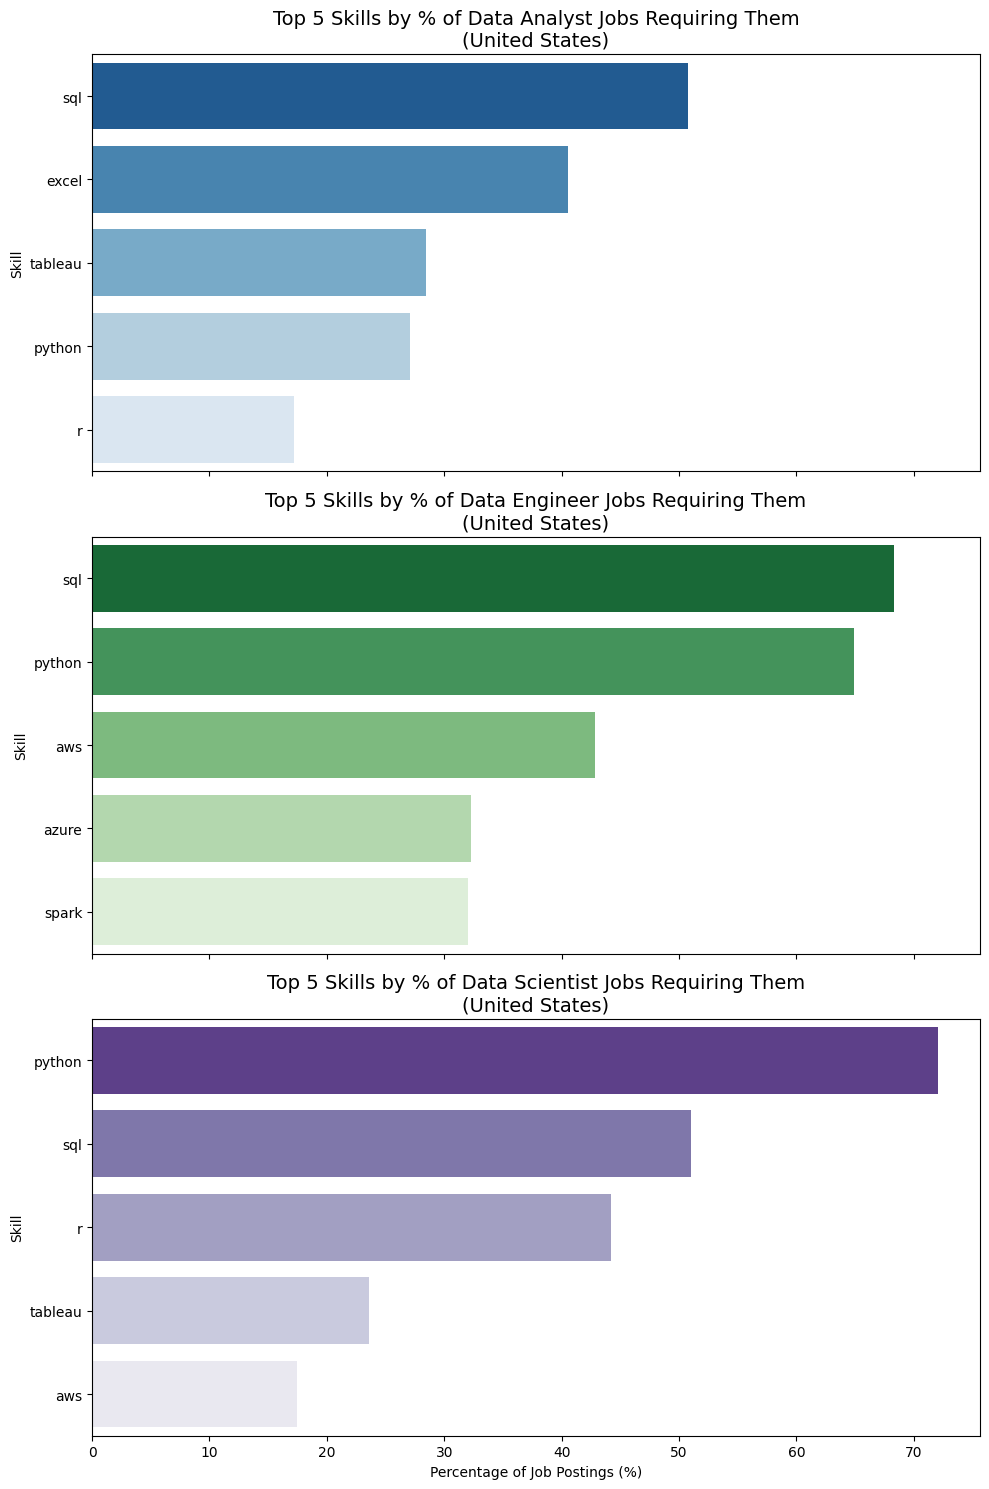

In [5]:
# 1. Filter for United States only
us_df = df[df['job_country'].str.lower() == 'united states']

# 2. Define job titles and their color palettes
titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
palettes = ["Blues", "Greens", "Purples"]

# 3. Find the global max percentage for x-axis limit
global_max = 0
top_skills_list = []
for title in titles:
    sub_df = us_df[us_df['job_title_short'].str.lower() == title.lower()].copy()
    total_jobs = sub_df.shape[0]
    sub_df['job_idx'] = sub_df.index  # create a unique job id if not present
    exploded = sub_df.explode('job_skills')
    # Each (job_idx, job_skills) pair should be unique
    skill_counts = exploded.drop_duplicates(subset=['job_idx', 'job_skills']).groupby('job_skills').size()
    # Get top 5 skills by job count, then calculate percentage
    top_skills = (skill_counts.sort_values(ascending=False).head(5) / total_jobs * 100)
    top_skills_list.append(top_skills)
    if not top_skills.empty:
        global_max = max(global_max, top_skills.max())

# 4. Create subplots: 3 rows, 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# 5. Plot for each job title
for i, (title, palette, top_skills) in enumerate(zip(titles, palettes, top_skills_list)):
    colors = sns.color_palette(palette, n_colors=5)[::-1]
    sns.barplot(
        x=top_skills.values,
        y=top_skills.index,
        hue=top_skills.index,  # Use index as hue to color bars
        ax=axs[i],
        palette=colors
    )
    axs[i].set_title(f'Top 5 Skills by % of {title} Jobs Requiring Them\n(United States)', fontsize=14)
    axs[i].set_xlabel('Percentage of Job Postings (%)')
    axs[i].set_ylabel('Skill')
    axs[i].set_xlim(0, global_max * 1.05)

plt.tight_layout()
plt.show()